# Basic raster operations

Gridded data that represent characteristics of the Earth's surface, the subsurface and the atmosphere are ubiquitous in earth science as well as in climatology, oceanography and geophysics. These data are generated from field observations, earth observation, and/or spatiotemporal modelling. To answer relevant questions with these data, you need to understand the details of the data source, to standardize the data to a common projection and bounding box, and to combine data sources. High-resolution spatial data comprises large data files, which leads to storage and memory challenges. Therefore, we will start with a small dataset, but we will also address methods to carry out computations at scale. 

__The objectives__ of this notebook are to (1) learn to explore spatial raster data and (2) to homogenize the data, and (3) calculate zonal statistics.

### Example problems

Example questions that can be answered with these operations are:
- Is the vegetation more photosynthetically active on north-, or south-facing slopes?
- What is the temperature difference between builtup areas, forest and 
- How does the size of the green surface area affect biodiversity?


In this notebook, we will address the following components to enable answering these kinds of question:
- Reading and writing spatial data (inluding stacking multiband images)
- Data visualisation 
- Reprojection
- Homogenisation through clipping and resampling
- Mosaicking
- Zonal statistics

## Reading and writing single band gridded data

**note** Work with xarray for now.

We will work with a digital elevation model (DEM) of a part of the French alps. The DEM only has a single band of data with terrain height values. Open the DEM (see '../data/dem.tif') in QGIS and inspect the properties in the user interface. Find the following information: 
- coordinate system
- the number of rows and columns
- and the bounding box of this dataset. 

The code below opens and plots the data, and it gives the same information through the 'rio' accessor. 

__Assert that the information you got from QGIS equals the info below.__

crs =  EPSG:32631
nr cols, nr rows =  3065 1895
xmin, ymin, xmax, ymax =  (715657.6212181412, 4916706.169415978, 730982.6212181412, 4926181.169415978)


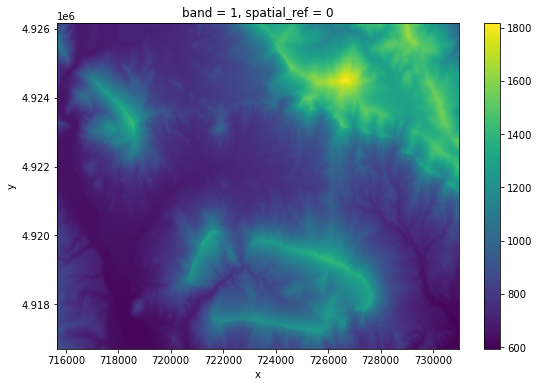

In [1]:
from os.path import join as pjoin
import numpy as np
import xarray as xr
import rioxarray

data_dir = '../data'
scratch_dir = '../scratch'

# read and plot the data
dem = rioxarray.open_rasterio(pjoin(data_dir, "dem.tif"))
dem.plot(figsize=(9,6))

print ('crs = ', dem.rio.crs)
print ('nr cols, nr rows = ', dem.rio.width, dem.rio.height)
print ('xmin, ymin, xmax, ymax = ', dem.rio.bounds())

# write the data to file in the scratch directory
dem.rio.to_raster(pjoin(scratch_dir, 'dem_out.tif'))

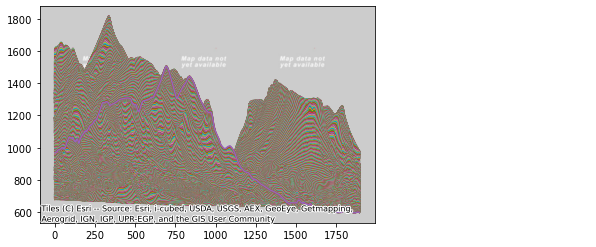

In [2]:
import contextily
import geopandas

# db = geopandas.read_file(
#     "http://darribas.org/gds_course/content/data/dar_es_salaam.geojson"
# )

# ax = db.plot(
#     facecolor="none", 
#     edgecolor="red",
#     linewidth=0.5,
#     figsize=(9, 9)
# )
# contextily.add_basemap(
#     ax, 
#     crs=db.crs, 
#     source=contextily.providers.Esri.WorldImagery
# );
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.plot(dem[0])

contextily.add_basemap(ax, crs=dem.rio.crs.to_string(), source=contextily.providers.Esri.WorldImagery)

## Reading and writing multiband satellite data
The second example is Sentinel 1 multispectral data. These images consist of separate files for each of the bands.

In [3]:


import datashader as ds
from datashader.transfer_functions import shade
from datashader.transfer_functions import stack
from datashader.transfer_functions import dynspread
from datashader.transfer_functions import set_background
from datashader.colors import Elevation




In [4]:

#stack(
#    shade(hillshade(dem), cmap=["grey", "white"]),
#    shade(dem, cmap=Elevation, alpha=128),)

## Reprojection

## Stacking and visualisation